# ДОМАШНЕЕ ЗАДАНИЕ № 1. Классификация  
Выполнил студент группы РИМ-130908 Коньков Владислав Александрович.  

# Описание и ход работы  
Для реализации работы выбран алгоритм - Метод опорных векторов.  
В качестве датасета выбран - Rice (Cammeo and Osmancik). [Ссылка](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik).  
В качестве переменной выступает вид риса, сам вид классификации - бинарный.  
Ниже в комментариях подробно описана сама работа и ход выполнения

## Подключение библиотек  
В данном блоке подключаем набор библиотек для реализации обучения модели svm. Помимо стандартного набора(sklearn, pandas, matplotlib, seaborn), также подключаем библиотеку ucimlrepo, которая используется для скачивания датасета, и optuna, для реализации поиска лучших гиперпараметров.

In [546]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install ucimlrepo
!pip install optuna

DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue track

^C


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [547]:
from ucimlrepo import fetch_ucirepo
import optuna
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Вспомогательные функции  
В данном блоке реализуем две дополнительные функции для удобства переиспользования кода. print_classification_report - для отображения метрик модели, plot_confusion_matrix - для отрисовки матрицы ошибок.

In [548]:
def print_classification_report(y_test_for_cr, y_pred_for_cr):
    """Печать метрик классификации.\n  
    Параметры:\n
    y_test_for_cr: тестовые метки \n
    y_pred_for_cr: предсказанные метки
    """
    report = classification_report(y_test_for_cr, y_pred_for_cr, labels=[0, 1], target_names=['Cammeo', 'Osmancik'],
                                   digits=6)
    print(report)


def plot_confusion_matrix(y_test_for_cm, y_pred_for_cm):
    """Построение и вывод матрицы ошибок.\n  
    Параметры:\n
    y_test_for_cm: тестовые метки \n
    y_pred_for_cm: предсказанные метки
    """
    cm = confusion_matrix(y_test_for_cm, y_pred_for_cm, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['Cammeo', 'Osmancik'])
    disp.plot(cmap='inferno')
    plt.show()



## Загрузка датасета  
  
Датасет взят отсюда - [Rice (Cammeo and Osmancik)](https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik)  
Также есть научная работа, в результате которой появился даннный датасет - [ссылка](https://ijisae.org/index.php/IJISAE/article/view/1068/599)
  
### Описание датасета  
Area - количество пикселей в границах рисового зерна  
Perimeter - длина окружености рисового зерна в пикселях  
Major_Axis_Length - Самая длинная линия, которую можно провести на рисовом зерне, т.е. расстояние до главной оси  
Minor_Axis_Length - Кратчайшая линия, которую можно провести по рисовому зерну, т.е. расстояние между малыми осями  
Eccentricity - Эксцентриситет  
Convex_Area - Возвращает количество пикселей наименьшей выпуклой оболочки области, образованной рисовым зерном  
Extent - Возвращает отношение области, образованной рисовым зерном, к ограничительной рамке  

Целевая переменная Class - вид риса Cammeo или Osmancik

In [549]:
# Для скачивания датасета используем библиотеку ucimlrepo
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# Сетим в X признаки в виде датафрейма
X = rice_cammeo_and_osmancik.data.features
# Сетим в y целевую переменную в виде датафрейма
y = rice_cammeo_and_osmancik.data.targets

Area - количество пикселей в границах рисового зерна  
Perimeter - длина окружености рисового зерна в пикселях
Major_Axis_Length - Самая длинная линия, которую можно провести на рисовом зерне, т.е. расстояние до главной оси
Minor_Axis_Length - Кратчайшая линия, которую можно провести по рисовому зерну, т.е. расстояние между малыми осями 
Eccentricity - Эксцентриситет  
Convex_Area - Возвращает количество пикселей наименьшей выпуклой оболочки области, образованной рисовым зерном  
Extent - Возвращает отношение области, образованной рисовым зерном, к ограничительной рамке  

## Анализ данных  
Для начала проведем небольшой анализ данных, для того чтобы понять какие фичи пригодятся, что можно убрать и как распределеный данные.

In [550]:
# Делаем сводку по фичам, все признаки у нас числового типа, пока бросается в глаза минимальное значение для признака Eccentricity, слишком далеко отклонилась величина от средней, скорее всего аномалия
X.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [551]:
# Делаем сводку по целевой переменной
y.describe()

,Class
count,3810
unique,2
top,Osmancik
freq,2180


In [552]:
# Считаем количество значений для классов, один класс явно перевешивает другой, выборка несбалансированная
y['Class'].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

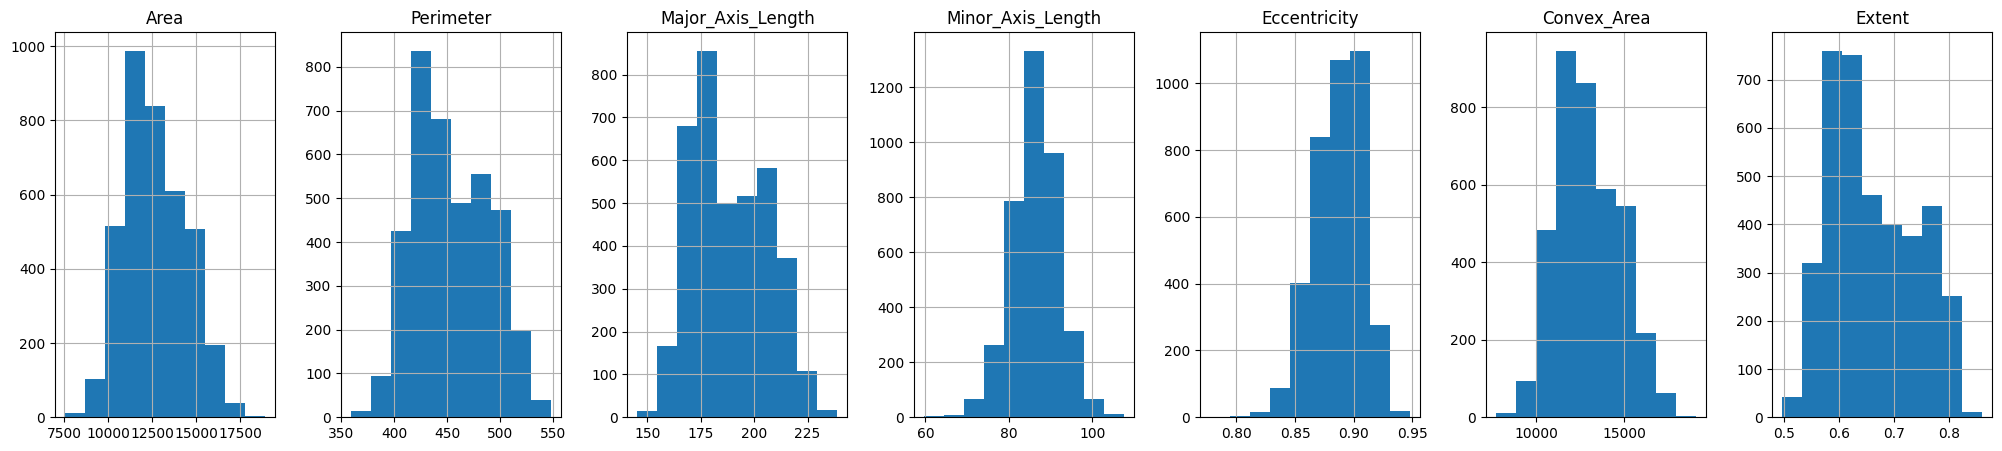

In [553]:
# Визуализируем с помощью гистограммы распределение значений признаков, в целом везде похоже на нормальное, для Eccentricity наблюдается смещение, обусловленно несколькими строками с низким значением
columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
fig, axs = plt.subplots(1, 7, figsize=(25, 5))
X.hist(column=columns, ax=axs);

In [554]:
# Добавляем к датафрейму с признаками столбки с классом, чтобы построить более сложный график
X_with_y = X.copy(True)
X_with_y.insert(7, 'Class', y['Class'])
X_with_y

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


<Figure size 1500x1500 with 0 Axes>

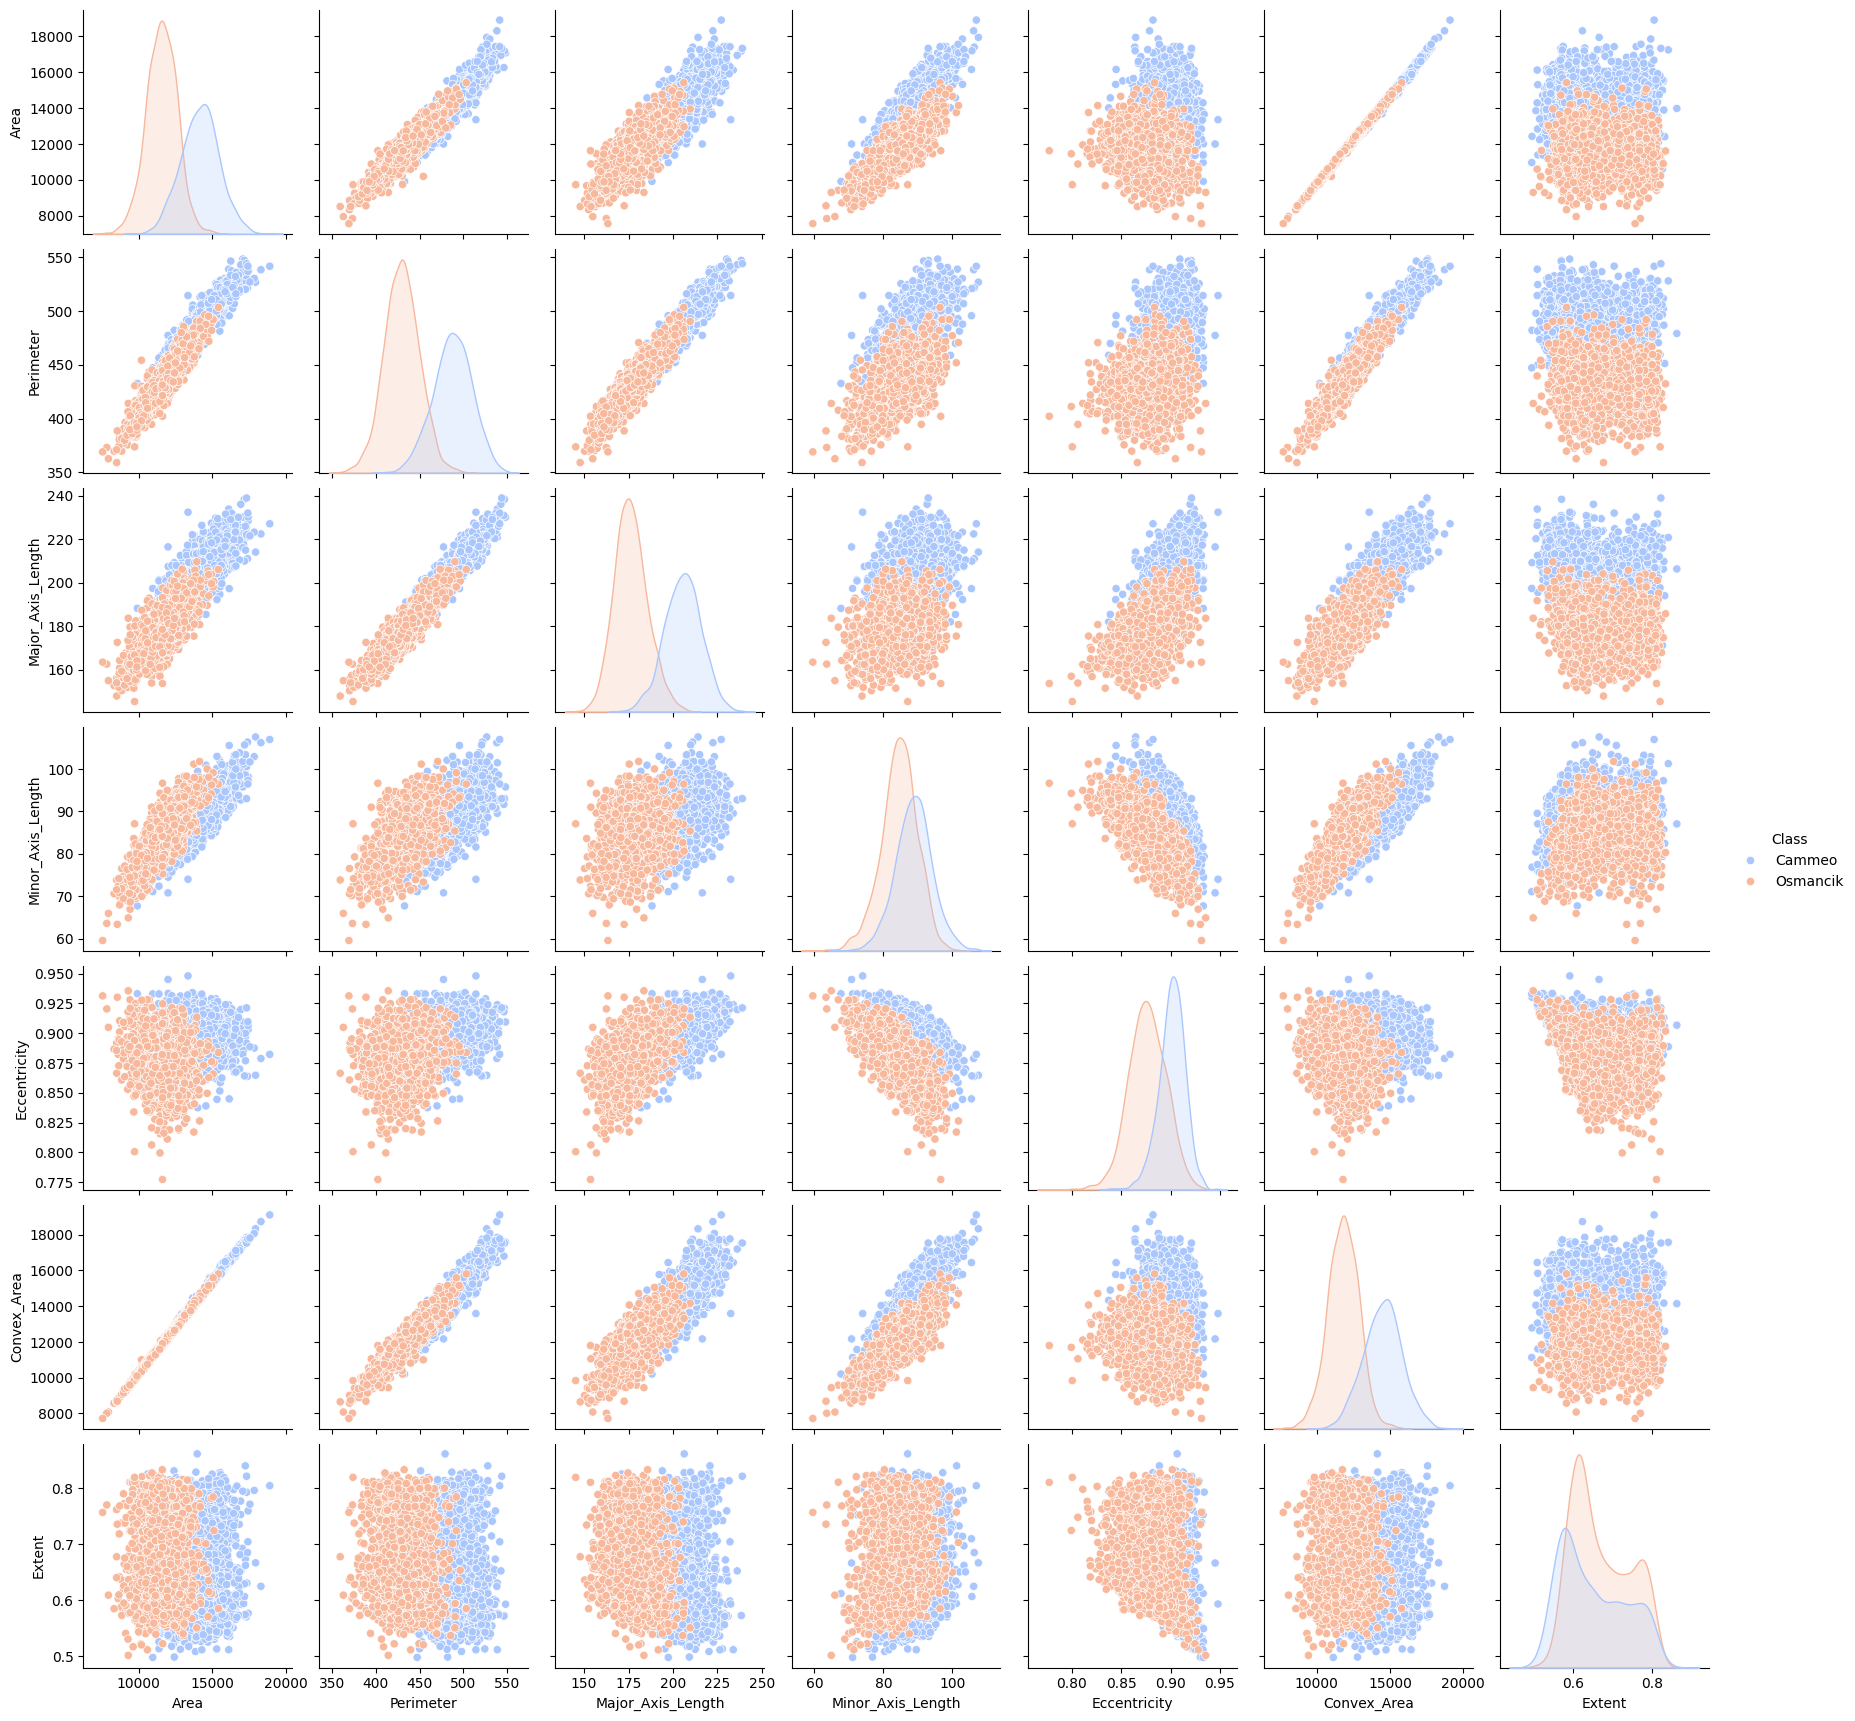

In [555]:
# C помощью seaborn строим pairplot для каждой фичи, подсвечиваем целевую переменную. По графикам видна линейная связь фич между собой, а также распределение класса для одного параметра.
plt.figure(figsize=(15, 15))
sns.pairplot(data=X_with_y,
             hue='Class',
             palette='coolwarm')

По графику выше стоит обратить внимание на парные графики признаков Area, Perimeter, Major_Axis_Length Convex_Area, просматривается линейная связь между ними.  
Также стоит обратить внимание на график распределения величины для Minor_Axis_Length (по обоим осям Minor_Axis_Length) и для Extent (по обоим осям Extent). Для Extent видно что этот признак плохо разделяет оба класса, а для Minor_Axis_Length плохо определяется класс Cammeo.

In [556]:
# Для уточнения линейной связи между признакми построим корреляционную таблицу с коефицентами для пары признаков. 
cm = sns.color_palette("vlag", as_cmap=True)
X.corr().style.background_gradient(cmap=cm,
                                   vmin=-1,
                                   vmax=1)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


По таблице выше видно, насколько сильно связаны между собой Area, Perimeter, Major_Axis_Length Convex_Area, особенно для Convex_Area и Area.

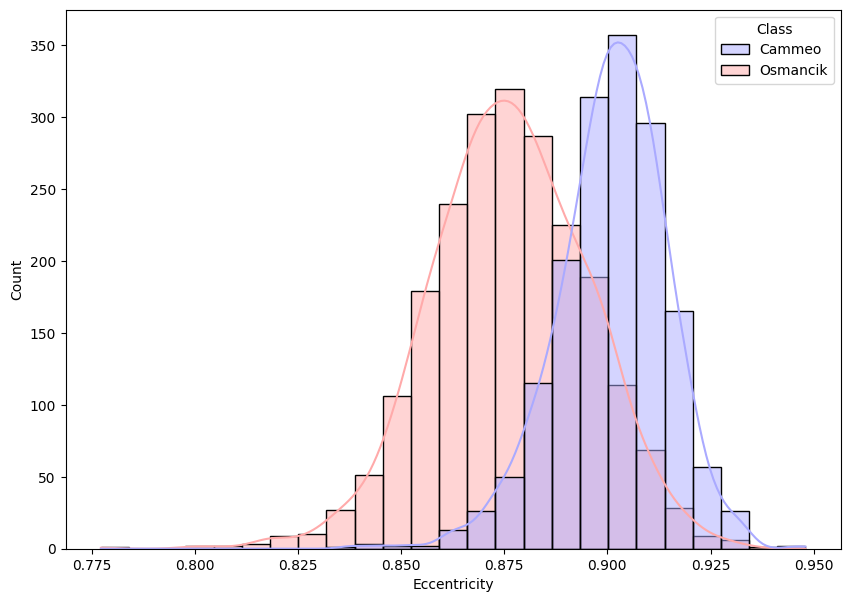

In [557]:
# Строим также гистограмму для конкретного признака Eccentricity, чтобы получше разглядеть распределения значений признака.
plt.figure(figsize=(10, 7))
sns.histplot(data=X_with_y,
             x='Eccentricity',
             hue='Class',
             bins=25,
             kde=True,
             palette='bwr');

По гистограмме видно, что справа(немного) и слева(побольше) относительно центра есть выбросы в данных

### Итог по анализу данных  

По всем вышепостроенным графикам и статистикам можно сделать следующие выводы:  
1. Признак Extent в классификации видов риса точно не помощник, по нему практически невозможно разделить данные на классы, да и в целом если посмотреть по описанию этого признака, тоже становится ясно что он не может как то определять вид риса. Удаляем данный признак.
2. Признак Minor_Axis_Length также, как и предыдущий вносит проблемы в определение класса, хотя по нему в целом можно определять класс Osmancik, он очень плохо подходит для определения класса Cammeo, поэтому данный признак тоже удаляем.
3. Признаки Area, Perimeter, Major_Axis_Length, Convex_Area так или иначе имеют между собой линейную связь и судя по графика имеют близкое распределение значений, то есть в целом из этого набора хватит одного признака для классификации. Больше всего визуально подходит - Major_Axis_Length. Судя по парному графику у него меньшая площадь пересечения значений по двум классам, что значит что он лучше разделяет данные классы. Major_Axis_Length - возьмем, остальные удалим.
4. Последний оставшийся признак Eccentricity, судя по гистограмме имеет пару выбросов, но в целом подходит как кандидат для классификации. Если судит по графикам, два класса неплохо разделяет и не так сильно коррелирует с оставшимся Major_Axis_Length. Данный признак оставим, удалим лишь выбросы.  

Итого для классификации из имеющегося набора признаков будем использовать только два - Major_Axis_Length и Eccentricity.

## Предобработка данных  
В данном блоке работ реализуем то, что нашли на этапе анализа данных, также стандартизируем значения для оставшихся признаков

In [558]:
# Создаем массив с именами колонок, которые оставим для обучения модели
need_columns = ['Major_Axis_Length', 'Eccentricity']
# Создаем массив с именами колонок, которые удалим
drop_columns = ['Area', 'Perimeter', 'Minor_Axis_Length', 'Convex_Area', 'Extent']

In [559]:
# Удаляем ненужные колонки
X_cleared = X.drop(drop_columns, axis=1)
X_cleared

,Major_Axis_Length,Eccentricity
0,229.749878,0.928882
1,206.020065,0.895405
2,214.106781,0.912118
3,193.337387,0.891861
4,211.743378,0.906691
...,...,...
3805,170.486771,0.864280
3806,167.714798,0.845850
3807,183.572922,0.881144
3808,161.193985,0.874406


In [560]:
# Ищем строки для удаления аномалий для признака Eccentricity
for_delete = X_cleared.loc[(X_cleared['Eccentricity'] < 0.83) | (X_cleared['Eccentricity'] > 0.94)]
for_delete

,Major_Axis_Length,Eccentricity
1073,216.487747,0.945059
1217,232.480209,0.948007
1644,159.570267,0.815600
1657,170.232758,0.818751
1691,160.706329,0.819296
1987,164.748199,0.824895
2183,158.988831,0.818498
2215,156.777130,0.820558
2474,173.720901,0.824484
2491,169.255219,0.819935


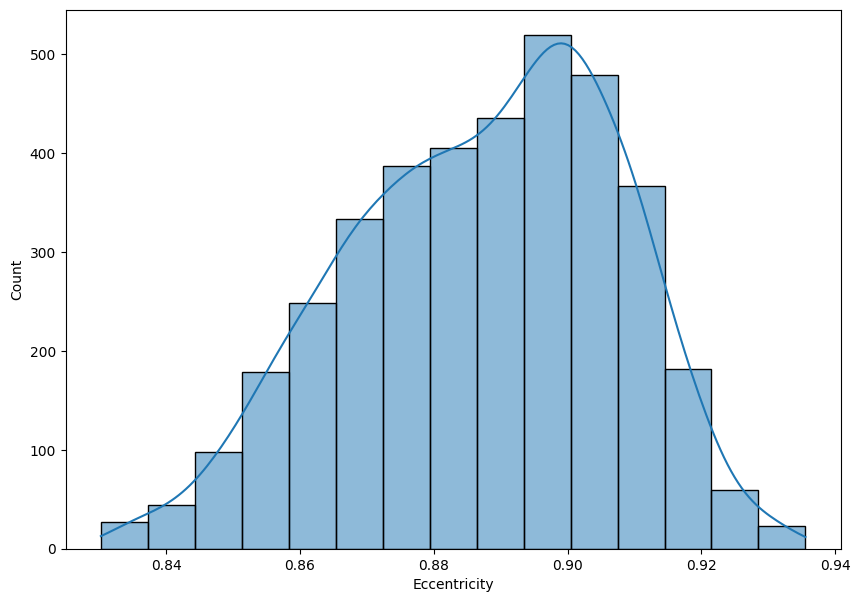

In [561]:
# Удаляем аномалии для признака Eccentricity
X_deleted = X_cleared.drop(for_delete.index)
# Строим еще раз гистограмму, чтобы посмотреть что получилось. В целом стало гораздо лучше.
plt.figure(figsize=(10, 7))
sns.histplot(data=X_deleted,
             x='Eccentricity',
             bins=15,
             kde=True);

In [562]:
# Удаляем аномалии из основного датафрейма для обучения
X_cleared = X_cleared.drop(for_delete.index)
# Удаляем строки аномалии из основного датафрейма с целевой переменной
y = y.drop(for_delete.index)

In [563]:
# Проводим стандартизацию для признаков
scaler = StandardScaler()
scaler.fit(X_cleared)
X_scaled = scaler.transform(X_cleared)
X_scaled_df = pd.DataFrame(X_scaled, columns=need_columns)
X_scaled_df

,Major_Axis_Length,Eccentricity
0,2.352498,2.071567
1,0.985535,0.405250
2,1.451372,1.237143
3,0.254945,0.228843
4,1.315228,0.967005
...,...,...
3780,0.220463,0.735644
3781,-1.061372,-1.143973
3782,-1.221052,-2.061352
3783,-0.307540,-0.304574


In [564]:
#Кодируем классы в 0 или 1, Cammeo = 0, Osmancik = 1
Label = LabelEncoder()
Label.fit(y['Class'])
y.loc[:, 'Encoded_class'] = Label.transform(y['Class'])
y

,Class,Encoded_class
0,Cammeo,0
1,Cammeo,0
2,Cammeo,0
3,Cammeo,0
4,Cammeo,0
...,...,...
3804,Osmancik,1
3805,Osmancik,1
3806,Osmancik,1
3807,Osmancik,1


## Подготовка выборок  

В данном блоке делим выборку на тренировочную и тестовую, с учетом того что выборка несбалансированна, используем параметр stratify для этого

In [565]:
# Разбиваем выборку на тренировочну и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y['Encoded_class'], test_size=0.3, random_state=42,
                                                    stratify=y)
# Смотрим распределение по классам для тренировочной выборки
y_train.value_counts()

Encoded_class
1    1510
0    1139
Name: count, dtype: int64

In [566]:
# Смотрим распределение по классам для тестовой выборки
y_test.value_counts()

Encoded_class
1    647
0    489
Name: count, dtype: int64

## Обучение baseline модели  
В данном блоке обучаем модель с параметрами по умолчанию и смотрим метрики для тренировочной и тестовой выборки

In [567]:
# Обучаем модель с параметрами по умолчанию
model = SVC(random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [568]:
# Делаем предсказание для тестовой выборки и тренировочной
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

### Метрики для тренировочной выборки

In [569]:
# Вычисляем точность для тренировочной выборки
acc = accuracy_score(y_train, y_pred_train)
acc

0.9282748206870517

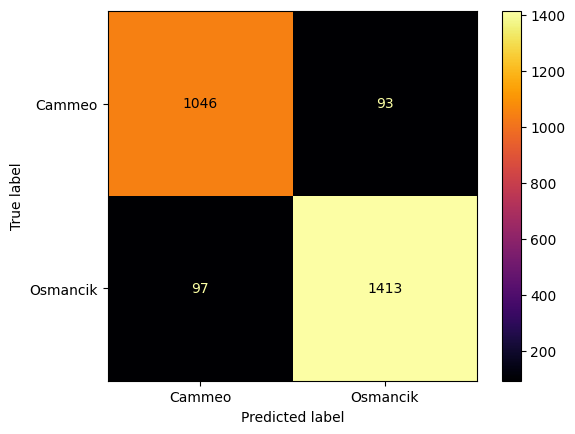

In [570]:
# Строим матрицу ошибок для тренировочной выборки
plot_confusion_matrix(y_train, y_pred_train)

In [571]:
# Находим метрики для тренировочной выборки
print_classification_report(y_train, y_pred_train)

              precision    recall  f1-score   support

      Cammeo   0.915136  0.918349  0.916740      1139
    Osmancik   0.938247  0.935762  0.937003      1510

    accuracy                       0.928275      2649
   macro avg   0.926691  0.927056  0.926871      2649
weighted avg   0.928310  0.928275  0.928290      2649



Метрики на тренировочной выборке очень неплохие и это с базовой моделью, посмотрим что с тестовой

### Метрики для тестовой выборки

In [572]:
# Вычисляем точность для тестовой выборки
acc = accuracy_score(y_test, y_pred)
acc

0.9278169014084507

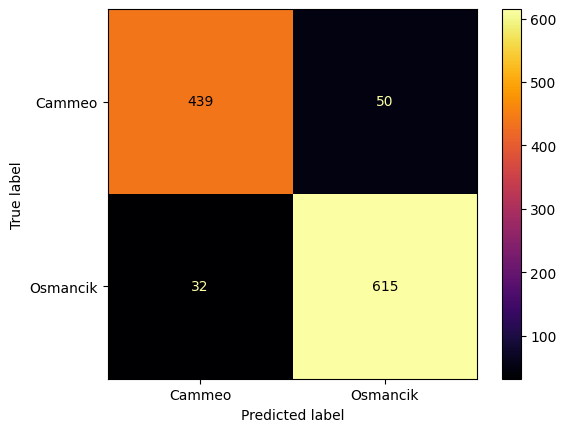

In [573]:
# Строим матрицу ошибок для тестовой выборки
plot_confusion_matrix(y_test, y_pred)

In [574]:
# Находим метрики для тестовой выборки
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

      Cammeo   0.932059  0.897751  0.914583       489
    Osmancik   0.924812  0.950541  0.937500       647

    accuracy                       0.927817      1136
   macro avg   0.928436  0.924146  0.926042      1136
weighted avg   0.927932  0.927817  0.927635      1136



Для тестовой выборки метрики получились сопоставимы с тренировочной, даже немного лучше

### Вывод по baseline модели  
По итогу даже просто модель с параметрами по умолчанию дала отличные результаты как на тренировочной, так и на тестовой выборке, скорее всего из-за того что сунули в модель только нужные признаки и стандартизировали их. Модель устойчива и не переобучилась. В целом по матрице ошибок видно что класс Cammeo предсказывается чуть хуже, но не сильно, возможно это обусловлено неровным распределением классов.

## Доработка модели  

В этом блоке попробуем покрутить гиперпареметрый и улучшить нашу модель.

In [521]:
# Для подбора гиперпареметров воспользуемся optuna, в качестве гиперпараметров попробуем покрутить kernel(тип ядра) и С(константа регуляризации), для определения лучших параметров используем метрику f1 score, так как нам важен баланс между Precision и Recall
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    c = trial.suggest_float('C', 1.0, 75.0, step=0.01)
    model_trial = SVC(kernel=kernel, C=c)
    model_trial.fit(X_train, y_train)
    y_pred_trial = model_trial.predict(X_test)
    f1_score_trial = f1_score(y_test, y_pred_trial, average='macro')

    return f1_score_trial

# Запускаем оптимизацию в 20 потоков и с 2000 испытаний
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2000, n_jobs=20)
# Выводим лучший результат по метрике f1
study.best_trial.value

[I 2024-05-27 19:57:18,450] A new study created in memory with name: no-name-75ec39c2-fc79-4f9c-ae1a-7c89dd7360b2
[I 2024-05-27 19:57:18,579] Trial 0 finished with value: 0.9250334927468824 and parameters: {'kernel': 'rbf', 'C': 12.33}. Best is trial 0 with value: 0.9250334927468824.
[I 2024-05-27 19:57:18,595] Trial 3 finished with value: 0.9233143816507263 and parameters: {'kernel': 'linear', 'C': 58.31}. Best is trial 0 with value: 0.9250334927468824.
[I 2024-05-27 19:57:18,618] Trial 1 finished with value: 0.9233143816507263 and parameters: {'kernel': 'linear', 'C': 58.6}. Best is trial 0 with value: 0.9250334927468824.
[I 2024-05-27 19:57:18,642] Trial 2 finished with value: 0.9269231166318685 and parameters: {'kernel': 'rbf', 'C': 26.07}. Best is trial 2 with value: 0.9269231166318685.
[I 2024-05-27 19:57:18,652] Trial 8 finished with value: 0.9233143816507263 and parameters: {'kernel': 'linear', 'C': 35.74}. Best is trial 2 with value: 0.9269231166318685.
[I 2024-05-27 19:57:18,

0.9287274841224398

In [533]:
# Выводим лучшие параметры
best_params = study.best_trial.params
best_params

{'kernel': 'rbf', 'C': 67.47}

По итогу сильно метрику увеличить не получилось, прирост всего лишь в 0.002, но в целом базовая модель уже была очень хороша

### Обучение best model

In [534]:
# Обучаем модель по полученным лучшим параметрам
best_model = SVC(random_state=42, kernel=best_params['kernel'], C=best_params['C'])
best_model.fit(X_train, y_train)

SVC(C=67.47, random_state=42)

In [535]:
# Предсказываем значения для тестовой выборки
y_pred_best = model.predict(X_test)
# Предсказываем значения для тренировочной выборки
y_pred_train_best = model.predict(X_train)

### Метрики для тренировочной выборки

In [536]:
# Вычисляем точность для тренировочной выборки
acc = accuracy_score(y_train, y_pred_train_best)
acc

0.9297848244620611

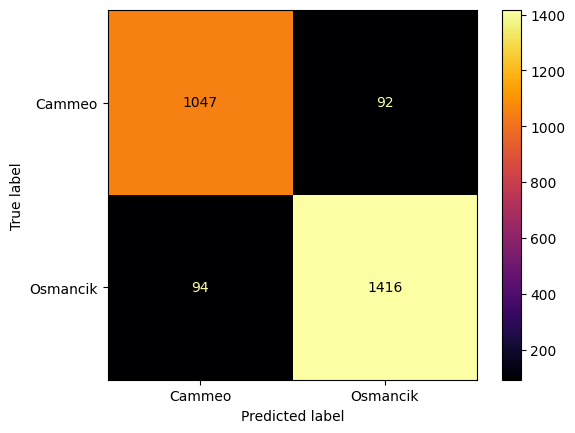

In [537]:
# Строим матрицу ошибок для тренировочной выборки
plot_confusion_matrix(y_train, y_pred_train_best)

In [538]:
# Находим метрики для тренировочной выборки
print_classification_report(y_train, y_pred_train_best)

              precision    recall  f1-score   support

      Cammeo   0.917616  0.919227  0.918421      1139
    Osmancik   0.938992  0.937748  0.938370      1510

    accuracy                       0.929785      2649
   macro avg   0.928304  0.928488  0.928395      2649
weighted avg   0.929801  0.929785  0.929792      2649



### Метрики для тестовой выборки

In [539]:
# Вычисляем точность для тестовой выборки
acc = accuracy_score(y_test, y_pred_best)
acc

0.9304577464788732

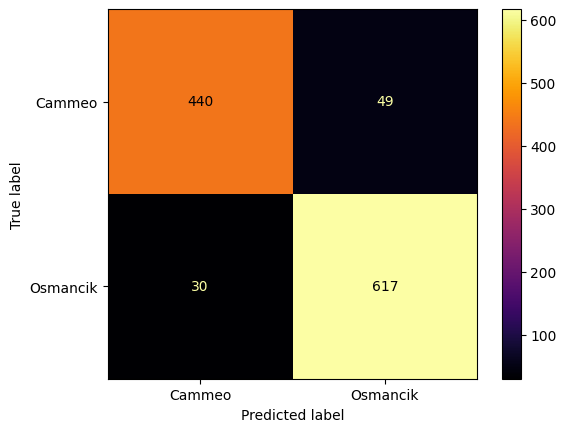

In [540]:
# Строим матрицу ошибок для тестовой выборки
plot_confusion_matrix(y_test, y_pred_best)

In [541]:
# Находим метрики для тестовой выборки
print_classification_report(y_test, y_pred_best)

              precision    recall  f1-score   support

      Cammeo   0.936170  0.899796  0.917623       489
    Osmancik   0.926426  0.953632  0.939832       647

    accuracy                       0.930458      1136
   macro avg   0.931298  0.926714  0.928727      1136
weighted avg   0.930621  0.930458  0.930272      1136



### Вывод  

Судя по метрикам, улучшенная модель получилось немного лучше :) но не сильно. Но и настраивалось всего два гиперпараметра, возможно, это можно улучшить включив другие гиперпараметры или сменить модель (к примеру применить LinearSVC)

# Итоговый вывод

Таким образом, был разработан классификатор для датасета Rice (Cammeo and Osmancik). Проведен предварительный анализ, в ходе которого были убраны ненужные признаки и убраны аномалии. Построенная базовая модель дала отличные результаты, метрика f1 ~ 0.926. После подбора гиперпараметров метрика f1 чуть чуть выросла ~ 0.928, но в целом базовая модель уже хорошо справлялась с задачей.